In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [4]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons
from sklearn.datasets import load_digits, load_wine, load_diabetes

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [15]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
# conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

# pip install lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

from sklearn.svm import SVR, SVC

import statsmodels.api as sm

from sklearn.tree import export_graphviz
import graphviz 

+ 회귀, 분류 이상치 탐지 등에 사용되는 지도 학습 방법
+ 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
+ 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습
+ 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
+ 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행


+ 관련 클래스
    - 회귀 , 분류 : SVR, SVC
    - 선형, 비선형 : LinearSVC, LinearSVR, KernelSVC, KernelSVR

# 1. 커널 기법 

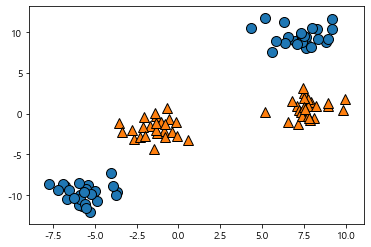

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


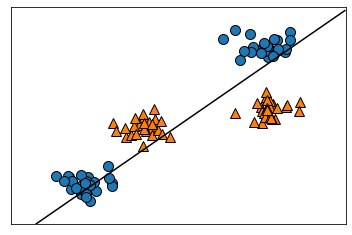

In [11]:
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

Text(0.5, 0, '특성1 ** 2')

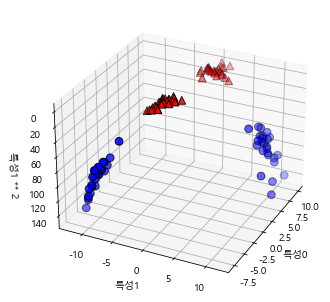

In [12]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

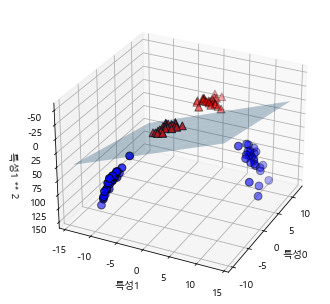

In [13]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

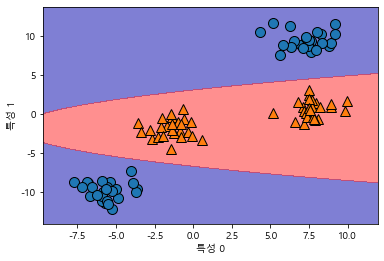

In [14]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 2. 하이퍼 파라미터

+ cost
    - decision boundary와 마진의 간격을 어느정도로 할지 결정
    - cost가 작으면 마진은 넓어진다.
    
    
+ gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamman가 작을 경우 영향을 끼치는 범위가 넓어진다.

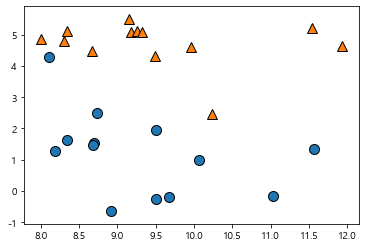

In [16]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [17]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)

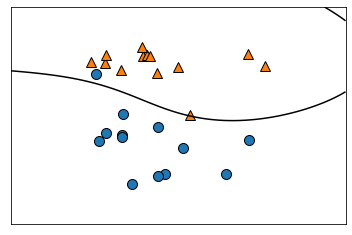

In [18]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [20]:
sv = svm.support_vectors_

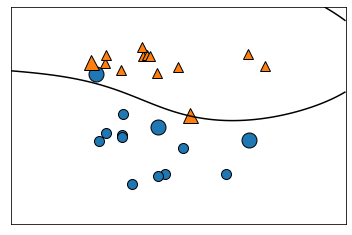

In [21]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)

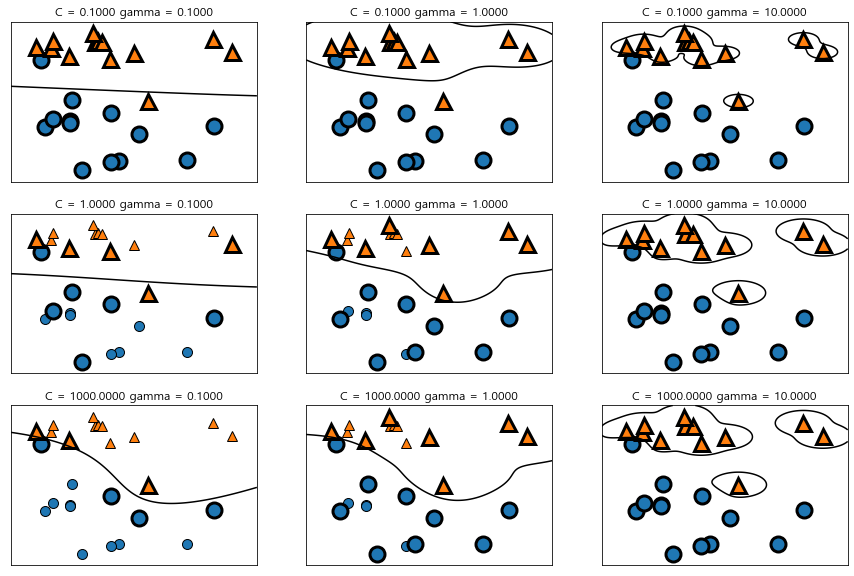

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)
    

# 3. SVM 클래스의 종류

In [23]:
import multiprocessing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

### (1) 회귀 모델과 분류 모델

#### 1) 회귀 모델 (SVR)

In [24]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.2177283706374875
테스트 결과 :  0.13544178468518187


#### 2) 분류 모델(SVC)

In [25]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 결과 : ", model.score(X_train, y_train))
print("테스트 결과 : ", model.score(X_test, y_test))

학습 결과 :  0.9014084507042254
테스트 결과 :  0.9230769230769231


### (2) 커널 기법

+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn에서는  Linear, Polynomial, RBF(Radial Basis Function) 등 다양한 커널기법을 지원

In [27]:
##### 회귀 모델에서 확인

X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("linear_svr 학습 결과 : ", linear_svr.score(X_train, y_train))
print("linear_svr 테스트 결과 : ", linear_svr.score(X_test, y_test))

polynomial_svr = SVR(kernel="poly")
polynomial_svr.fit(X_train, y_train)

print("polynomial_svr 학습 결과 : ", polynomial_svr.score(X_train, y_train))
print("polynomial_svr 테스트 결과 : ", polynomial_svr.score(X_test, y_test))

rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("rbf_svr 학습 결과 : ", rbf_svr.score(X_train, y_train))
print("rbf_svr 테스트 결과 : ", rbf_svr.score(X_test, y_test))

linear_svr 학습 결과 :  0.715506620496448
linear_svr 테스트 결과 :  0.6380398541506058
polynomial_svr 학습 결과 :  0.2024454261446289
polynomial_svr 테스트 결과 :  0.133668450367462
rbf_svr 학습 결과 :  0.2177283706374875
rbf_svr 테스트 결과 :  0.13544178468518187


In [28]:
##### 분류 모델에서 확인

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("linear_svc 학습 결과 : ", linear_svc.score(X_train, y_train))
print("linear_svc 테스트 결과 : ", linear_svc.score(X_test, y_test))

polynomial_svc = SVC(kernel="poly")
polynomial_svc.fit(X_train, y_train)

print("polynomial_svc 학습 결과 : ", polynomial_svc.score(X_train, y_train))
print("polynomial_svc 테스트 결과 : ", polynomial_svc.score(X_test, y_test))

rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("rbf_svc 학습 결과 : ", rbf_svc.score(X_train, y_train))
print("rbf_svc 테스트 결과 : ", rbf_svc.score(X_test, y_test))

linear_svc 학습 결과 :  0.960093896713615
linear_svc 테스트 결과 :  0.986013986013986
polynomial_svc 학습 결과 :  0.9014084507042254
polynomial_svc 테스트 결과 :  0.9230769230769231
rbf_svc 학습 결과 :  0.9014084507042254
rbf_svc 테스트 결과 :  0.9230769230769231


### (3) 매개변수 튜닝
    
+ SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
+ 매개변수를 변경하면서 성능 변화를 관찰

In [29]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [32]:
polynomial_svc = SVC(kernel="poly", degree=2, C=0.1, gamma="auto")
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, degree={}, C={}, gamma={}".format(2, 0.1, "auto"))
print("polynomial_svc 학습 결과 : ", polynomial_svc.score(X_train, y_train))
print("polynomial_svc 테스트 결과 : ", polynomial_svc.score(X_test, y_test))

kernel=poly, degree=2, C=0.1, gamma=auto
polynomial_svc 학습 결과 :  0.9835680751173709
polynomial_svc 테스트 결과 :  0.993006993006993
